# Física Computacional. Tarea 1.
$\text{Atzin López Tercero} $

$\text{Hecho en Python}$


In [1]:
#importamos las paqueterías necesarias
from pylab import *
import random
from numpy import array
from numpy import *
import math

1. Utilizando las notas de clase y notebooks de la página del curso genere una función que calcule derivadas e integrales numéricas que consideren una precisión en las que se desprecien términos mayores a $h^4$ en el espaciado de la malla en el dominio de la función. Muestra que tus funciones trabajan bien con un ejemplo en el cual calcules su derivada e integral de forma analítica.

En las notas de clase viene la forma de derivar una expresión de la derivada de $f(x)$ donde se desprecian términos de orden $h^5$ en adelante. Esto implica tener que hacer operaciones con dos puntos a la izquierda y dos a la derecha para una expresión simétrica. Esta expresión es:

$f'(x_i)=\frac{1}{12h}\left( -f(x_{i+2})+8f(x_{i+1})-8f(x_{i-1})+f(x_{i-2})\right)$

Los puntos extremos se calculan de manera asimétrica con la siguiente expresión:

$f'(x_i)=\frac{1}{h}\left(-\frac{25}{12}f(x_i)+4f(x_{i+1})-3f(x_{i+2})+\frac{4}{3}f(x_{i+3})-\frac{1}{4}f(x_{i+4})\right)$

En la siguiente celda se hace la programación de este algoritmo.


In [2]:
#Definimos la primer derivada despreciando los términos de orden mayores a 4 para una función f cuya malla es uniforme.
def deriv(f,x):
    f_prima = zeros(len(f)) 
    #Definimos el espacio entre dos puntos contiguos en la malla
    h=x[1]-x[0]
    for i in range (2,len(f)-2):
        f_prima[i]=(-f[i+2]+8*f[i+1]-8*f[i-1]+f[i-2])/(12*h)
    
       #Calculamos los puntos frontera a la izquierda
        f_prima[0] = (-(25/12)*f[0]+4*f[1]-3*f[2]+(4/3)*f[3]-(1/4)*f[4])/(h) #Primer punto 
        f_prima[1] = (-(25/12)*f[1]+4*f[2]-3*f[3]+(4/3)*f[4]-(1/4)*f[5])/(h) #Segundo punto
        
        #Calculando los puntos para frontera a la derecha
        f_prima[-1]=-(-(25/12)*f[-1]+4*f[-2]-3*f[-3]+(4/3)*f[-4]-(1/4)*f[-5])/(h) #Último punto N
        f_prima[-2]=-(-(25/12)*f[-2]+4*f[-3]-3*f[-4]+(4/3)*f[-5]-(1/4)*f[-6])/(h) #Penúltimo punto N-1
    return f_prima

La derivada de f(x) es:  [ 1.14374653e-05 -1.27859079e-01 -2.53652302e-01 -3.75263630e-01
 -4.90713138e-01 -5.98105151e-01 -6.95676293e-01 -7.81824450e-01
 -8.55135072e-01 -9.14404399e-01 -9.58659231e-01 -9.87172904e-01
 -9.99477227e-01 -9.95370160e-01 -9.74919143e-01 -9.38459981e-01
 -8.86591332e-01 -8.20164878e-01 -7.40271339e-01 -6.48222565e-01
 -5.45529995e-01 -4.33879837e-01 -3.15105384e-01 -1.91156909e-01
 -6.40696437e-02  6.40696437e-02  1.91156909e-01  3.15105384e-01
  4.33879837e-01  5.45529995e-01  6.48222565e-01  7.40271339e-01
  8.20164878e-01  8.86591332e-01  9.38459981e-01  9.74919143e-01
  9.95370160e-01  9.99477227e-01  9.87172904e-01  9.58659231e-01
  9.14404399e-01  8.55135072e-01  7.81824450e-01  6.95676293e-01
  5.98105151e-01  4.90713138e-01  3.75263630e-01  2.53652302e-01
  1.27859079e-01 -1.14374653e-05]


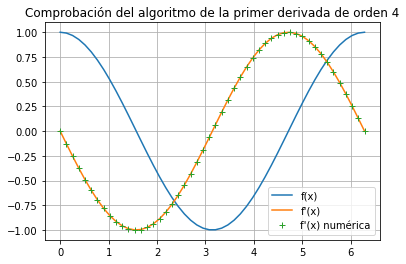

In [3]:
#Comprobando que la función anterior se aproxima a la primer derivada derivada 
#Escogemos la malla uniforme
x = linspace(0,2*pi,50)
#Escogemos la función de prueba a la que le vamos a calcular la primer derivada
y =cos(x)
#Para comprobar nuestro resultado también vamos a graficar la función de la derivada de y1 para ver que se aproximen
y_deriv=-sin(x)
y_num_deriv= deriv(y,x)
#Graficamos para corroborar que la derivada numerica corresponde con la derivada analítica
title("Comprobación del algoritmo de la primer derivada de orden 4")
plot(x,y, label="f(x)")
plot(x,y_deriv, label="f'(x)")
plot(x,y_num_deriv, '+', label="f'(x) numérica")
print('La derivada de f(x) es: ',deriv(y,x))
legend(),grid()
show()

 En clase vimos la forma de hacer la integral numérica en la que se aproxima la integral de una función de la siguiente manera:
 
 $\int_{x_i-h}^{x_i+h}f(x)dx=\frac{f(x_i-1)+4f(x_i)+f(x_i+1)}{3}h+O(h^5)$
 
En el caso de que se tenga un número par de puntos hay que recorrer el índice de inicio y agregar el punto inicial como se indica en las notas del curso:

 $\int_{x_0}^{x_0+h}f(x)dx=\frac{23 f(x_0)+ 26f(x_1)-4f(x_2)+6f(x_3)-3f(x_4)}{48}h+O(h^5)$
 
donde se desprecian los términos $O(h^5)$ (Suponiendo una malla uniforme). La función tendrá que contemplar si el número de puntos en la malla (N) es par o impar, ya que para calcular la integral en un punto $x_i$ contemplamos el punto $x_{i-1}$ y el $x_{i+1}$, es decir, se avanza de 2 en 2 por lo que podría llegar a sobrar 1 punto en la malla.

Por lo tanto, tenemos lo siguiente:

Si $N$ es impar, la suma tendrá que empezar en $i=2$  y terminar en $N-1$.

Si $N$ es par, la suma tendrá que empezar en $i=1$ y terminar en $N-1$ como en el caso anterior. En este caso, $x_1$ se realiza de forma independiente para que al final si alcancen todos los puntos.
 
Entonces programamos el algoritmo anterior:

In [4]:
#Definimos la función integral del ejercicio 
def int(x,y):
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[1] - x[0]
     #Si la malla en la cual vamos a integrar es par, pedimos que saque la integral a partir de segundo elemento
    if mod(len(y),2) == 0:
        inicio = 2
      #Si el número de puntos en la malla no es par le pedimos que inicie un elemento despues del primer elemento en la malla
    elif mod(len(y),2) == 1:
        inicio = 1
     #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(y)-1,2):
        integral += y[i+1] + 4*y[i] + y[i-1]
    integral = integral*(h/3)
    # punto inicial si se tiene un arreglo par
    #la integral en la frontera es
    if mod(len(y),2) == 0:
        integral += (h/48)*(23*y[0] + 26*y[1] - 4*y[2] + 6*y[3] -3*y[4])
    return integral
   

A continuación se muestra la utilización de la función anterior con una malla con un número impar y par de puntos para verificar que trabaja correctamente:

In [5]:
x = linspace(0,pi,50)
print("Número de puntos en la malla: ", len(x))
y = sin(x)
int(x,y)

Número de puntos en la malla:  50


2.0000029831024326

In [6]:
x = linspace(0,pi,47)
print("Número de puntos en la malla: ", len(x))
y = sin(x)
int(x,y)

Número de puntos en la malla:  47


2.0000002418615637

Y podemos comprobar que nuestro resultado es correcto ya que haciendo la integral en Mathematica el resultado es 2.

2. Calcule la derivada analítica de las funciones $f(x) = e^{−x^2}sin(10x)$ con $x\in [-5,5]$, y $g(x)=-\frac{2}{x^6}+\frac{1}{x^{12}}$ con $x\in [0.5,5]$ . Realice las gráficas de las funciones y sus primeras dos derivadas. Con los algoritmos
vistos en clase (los que desprecian terminos mayores a O($h^2$)), encuentre la derivada numérica de dichas funciones con error menor a $10^{−5}$ para cualquier punto y compare con las derivadas analıticas. También realice una comparacion utilizando la funcion derivada del problema anterior.

Iniciemos obtiendo las derivadas analíticas:

$f'(x)=2e^{-x^2}(5cos(10x)-xsin(10x))$ 

$f^{(2)}=e^{-x^2}(2(2x^2-51)sin(10x)-40xcos(10x))$

Por otro lado

$g'(x)=\frac{12}{x^{-7}}-\frac{12}{x^13}$

$g''(x)=-\frac{84}{x^{-8}}+\frac{156}{x^{-14}}$

Iniciamos graficando las funciónes: 

Para $f(x) = e^{−x^2}sin(10x)$ con $x\in [-5,5]$:

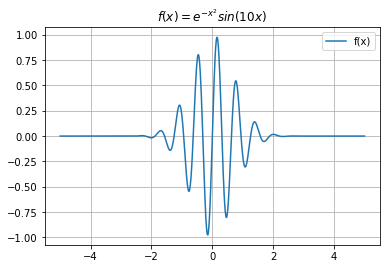

In [7]:
x=(linspace(-5,5,1000))
y=exp(-(x**2))*sin(10*x)
plot(x,y,label="f(x)")
title(r"$f(x) = e^{−x^{2}} sin(10x)$")
legend(),grid()
show()

Para  $g(x)=-\frac{2}{x^6}+\frac{1}{x^{12}}$ con $x\in [0.5,5]$:

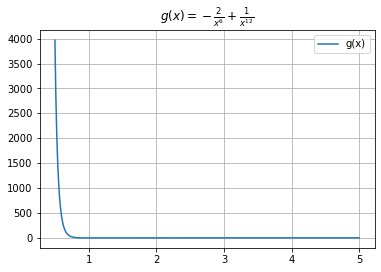

In [8]:
x=(linspace(0.5,5,1000))
y=-2/x**6+1/x**12
plot(x,y,label="g(x)")
title(r"$g(x)=-\frac{2}{x^{6}}+{\frac{1}{x^{12}}}$")
legend(),grid()
show()

Obteniendo ahora las derivadas de las funciones f(x) y g(x). Vamos primero a definir la función para calcular la primer derivada de una función que desprecie los términos de orden $h^3$. A continuación hacemos la programación de la derivada simétrica:

$f'(x_i)=\frac{f(x_{i+1})-f(x_{i-1})}{x_{i+1}-x_{i-1}}$

Para los puntos extremos las relaciones son:

$f'(x_0)=-\frac{f(x_1)-f(x_0)}{x_1-x_0}$

$f'(x_N)=-\frac{f(x_{N-1})-f(x_N)}{x_{N-1}-x_N}$

La ventaja de esta forma de hacer el cálculo de la derivada es que se desprecian términos de orden $h^3$ y por lo tanto una mejor precisión, entonces programamos:

In [9]:
def deriv_h3(f,x):
    f_prima1 = zeros(len(f))
    h = x[1] - x[0]
    dosh = 2*h
    for i in range(1,len(f)-1):
        f_prima1[i] = ( f[i+1]-f[i-1] )/(dosh)
    # calcular el primer punto
    f_prima1[0] = ( -0.5*f[2] + 2*f[1] -1.5*f[0] )/h
    # calcular el ultimo punto
    f_prima1[-1] = -( -0.5*f[-3] + 2*f[-2] -1.5*f[-1] )/h    
    return f_prima1

Iniciemos con la función f(x). Para la primer derivada:


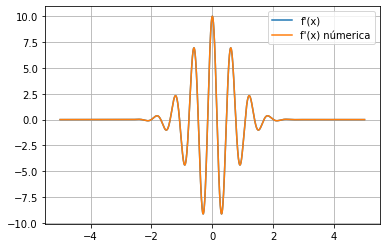

Error de la derivada usando la función de primer derivada en una malla uniforme = 1.766670365555001e-08


In [10]:
#Definimos la malla
x=(linspace(-5,5,1000000))
#La función es:
f=exp(-(x**2))*sin(10*x)
# La primer derivada analítica es:
fprima1=2*exp(-(x*x))*(5*cos(10*x)-x*sin(10*x))
#La primer derivada númerica con la función de primer derivada para una malla  uniforme
fprima1_num=deriv_h3(f,x)
#Graficamos ambas derivadas
plot(x,fprima1,label="f'(x)")
plot(x,fprima1_num,label="f'(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la derivada usando la función de primer derivada en una malla uniforme =" ,
      max(abs(fprima1-fprima1_num)) )

Ahora vamos a calcular la segunda derivada usando la función deriv_h3 nuevamente para $f''(x)$:

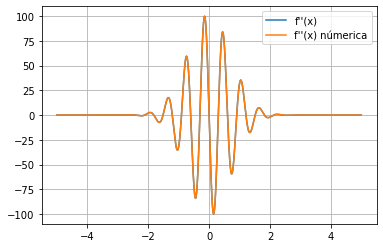

Error de la segunda derivada de orden 2 = 2.2251043795051828e-05


In [11]:
#Segunda derivada analítica
fprima2_2=2*exp(-(x*x))*(2*x**2*sin(10*x)-51*sin(10*x)-20*x*cos(10*x))
#Aplicamos el algoritmo nuevamente 
fbiprima1_num=deriv_h3(fprima1_num,x)
#Graficamos ambas derivadas
plot(x,fprima2_2,label="f''(x)")
plot(x,fbiprima1_num,label="f''(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada de orden 2 =" ,
      max(abs(fprima2_2-fbiprima1_num)) )

Obtenemos la primer derivada con la función primer derivada de orden cuatro:

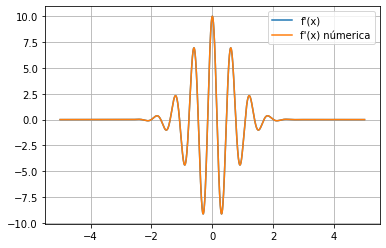

Error de la primer derivada de orden 4 = 1.9484858171381347e-11


In [12]:
x=(linspace(-5,5,50000))#
f=exp(-(x**2))*sin(10*x)
## La derivada analitica
fprima22_2=2*exp(-(x*x))*(5*cos(10*x)-x*sin(10*x))
##La derivada analítica para una malla uniforme
fprima22_2_num=deriv(f,x)
#Graficamos ambas derivadas
plot(x,fprima22_2,label="f'(x)")
plot(x,fprima22_2_num,label="f'(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la primer derivada de orden 4 =" ,
      max(abs(fprima22_2-fprima22_2_num)) )

Por último obtenemos la segunda derivada con la función de orden cuatro volviendo a aplicar deriv:

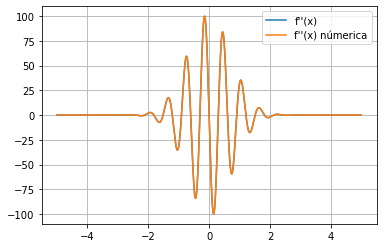

Error de la segunda derivada de orden 4 = 7.33091443265721e-05


In [13]:
x=(linspace(-5,5,50000))#
#Segunda derivada analítica
fprima2_2=2*exp(-(x*x))*(2*x**2*sin(10*x)-51*sin(10*x)-20*x*cos(10*x))
#Aplicamos el algoritmo nuevamente 
fbiprima2_num=deriv_h3(fprima22_2_num,x)
#Graficamos ambas derivadas
plot(x,fprima2_2,label="f''(x)")
plot(x,fbiprima2_num,label="f''(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada de orden 4 =" ,
      max(abs(fprima2_2-fbiprima2_num)) )




Pasamos ahora a obtener la derivada para la función g(x).

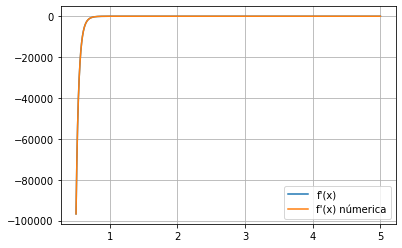

Error de la primera derivada = 0.0004808064259123057


In [14]:
x=(linspace(0.5,5,1000000))##0.1
#x=(linspace(0.5,5,49005000))

y=-2/x**6+1/x**12
## La  derivada analitica

yprima11=12/x**7-12/x**13
#La derivada analítica para una malla  uniforme

##La derivada analítica para una malla uniforme
yprima11num=deriv_h3(y,x)
#Graficamos ambas derivadas
plot(x,yprima11,label="f'(x)")
plot(x,yprima11num,label="f'(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la primera derivada =" ,
      max(abs(yprima11-yprima11num)) )

Ahora vamos a calcular la segunda derivada usando la función deriv_h3 nuevamente para $g''(x)$:

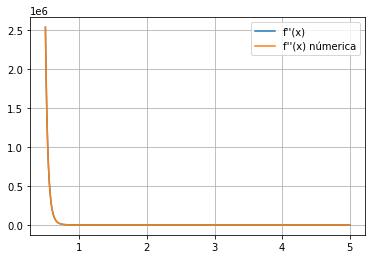

Error de la segunda derivada  uniforme = 240.54129425389692


In [15]:
x=linspace(0.5,5,1000000)
## La segunda derivada analitica
yprima2_1=-84/x**8+156/x**14
#La derivada numérica para una malla uniforme
ybiprima11num=deriv_h3(yprima11num,x)
#Graficamos ambas derivadas
plot(x,yprima2_1,label="f''(x)")
plot(x,ybiprima11num,label="f''(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada  uniforme =" ,
      max(abs(yprima2_1-ybiprima11num)) )

Se aprecia que no se obtuvó la malla correcta para generar un error menor a $10^{-3}$ , esto debido a que anexarle más puntos a las mallas generaba un tiempo de ejecución muy grande que ya no era viable. Para poseer un menor error se podría obtener la ecuación para las derivadas de mayor orden, así como también el uso de mallas no uniformes que posean una alta acumulación de puntos en las secciones donde las funciones cambian en gran medida.

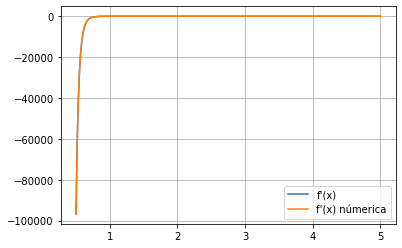

Error de la segunda derivada de orden 4 = 3.6079436540603638e-06


In [16]:
x=(linspace(0.5,5,500000))##0.1
#x=(linspace(0.5,5,49005000))

y=-2/x**6+1/x**12
## La 2da derivada analitica

yprima12=12/x**7-12/x**13
#La derivada analítica para una malla uniforme

##La derivada analítica para una malla uniforme
yprima12num=deriv(y,x)

#Graficamos ambas derivadas
plot(x,yprima12,label="f'(x)")
plot(x,yprima12num,label="f'(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada de orden 4 =" ,
      max(abs(yprima12-yprima12num)) )

Por último obtenemos la segunda derivada con la función de orden cuatro:

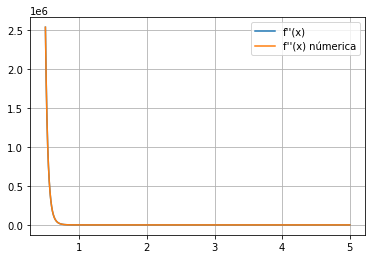

Error de la segunda  derivada de orden 4 = 2.0844414113089442


In [17]:
x=(linspace(0.5,5,500000))##0.1
#x=(linspace(0.5,5,49005000))
ybiprima12num=deriv(yprima12num,x)
## La 2da derivada analitica
yprima13=-84/x**8+156/x**14
#Graficamos ambas derivadas
plot(x,yprima13,label="f''(x)")
plot(x,ybiprima12num,label="f''(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda  derivada de orden 4 =" ,
      max(abs(yprima13-ybiprima12num)) )

Se aprecia que no se obtuvó la malla correcta para generar un error menor a $10^{-5}$ , esto debido a que anexarle más puntos a las mallas generaba un tiempo de ejecución muy grande que ya no era viable. Para poseer un menor error se podría obtener la ecuación para las derivadas de mayor orden, así como también el uso de mallas no uniformes que posean una alta acumulación de puntos en las secciones donde las funciones cambian en gran medida.

3.Utilizando las funciones en el primer problema, obtenga el valor de la integral de una funci ́on despre-
ciando t ́erminos mayores a $h^4$ para una malla uniforme y calcule las siguientes integrales:

$(a)\int_0^5f(x)dx$

$(a)\int_{-5}^5f^2(x)dx$

$(a)\int_{0.5}^5g(x)dx$

donde $f(x)$ y $g(x)$ son las mimas que las del problema 2. Muestre que ha podido obtener la integral hasta una precisión de $10^{-5}$.



Obtenemos la integral de f(x) de 0 a 5:


In [18]:
#Definimos la función integral del ejercicio 
def int1(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla en la cual vamos a integrar es par, pedimos que saque la integral a partir de segundo elemento
    if mod(len(f),2) == 0:
        inicio = 2
    #Si el número de puntos en la malla no es par le pedimos que inicie un elemento despues del primer elemento en la malla
    elif mod(len(f),2) == 1:
        inicio = 1
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(f)-1,2):
        integral += f[i+1] + 4*f[i] + f[i-1]
    integral = integral*(h/3)
    #la integral en la frontera es
    if mod(len(f),2) == 0:
        integral += (h/48)*(23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
    return integral

In [19]:
# Obtenemos entonces la integral de f(x):
#Definimos la malla
x=linspace(0,5,107)
f=exp(-(x*x))*sin(10*x)
print('La integral de f(x) es: ',int1(f,x))
#Dicha integral, hecha en wolfram tiene el valor de :
m=0.1021340744237976138708054220876899
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-int1(f,x)))

La integral de f(x) es:  0.10216413209752144
La precisión de la integral es:  3.0057673723826728e-05


Ahora obtenemos un algoritmo para la integral de $f(x)$ , para ello en la funcion int1, hacemos el cambio de $f(x) \rightarrow f^2(x)$.

In [20]:
# Obteniendo ahora el algoritmo para la segunda integral, es lo mismo pero en este caso tendremos f^2
#Para ello hacemos el cambio de variable de f a f^2
#Definimos la función integral del ejercicio 1a
def int2(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla en la cual vamos a integrar es par, pedimos que saque la integral a partir de tercer elemento
    if mod(len(f),2) == 0:
        inicio = 2
    #Si el número de puntos en la malla no es par le pedimos que inicie un elemento despues del primero en la malla
    elif mod(len(f),2) == 1:
        inicio = 1
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(f)-1,2):
        integral += f[i+1]*f[i+1] + 4*f[i]*f[i] + f[i-1]*f[i-1] #aquí es donde de incluye el $f^2$
    integral = integral*(h/3)
    # punto inicial si se tiene un arreglo par
    if mod(len(f),2) == 0:
        integral += (h/48)*(23*f[0]*f[0] + 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])
    return integral

Obtenemos la integral de $f^2(x)$:

In [21]:
# Obtenemos entonces la integral de f(x):
#Definimos la malla
x=linspace(-5,5,48)
f=exp(-(x*x))*sin(10*x)
print(r'La integral de $f^{2}(x)$ es ', int2(f,x))
#Dicha integral, hecha en wolfram tiene el valor de :
m=0.6266570686577501256038175123698260447534631408887006665615074330
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-int2(f,x)))

La integral de $f^{2}(x)$ es  0.6266644078503681
La precisión de la integral es:  7.339192617972223e-06


Obtenemos ahora la integral de g(x), donde usaremos la función int1.

In [22]:
#Notemos que el código para la primera integral nos sirve para el inciso c
x=linspace(0.5,5,1051)
f=-(2/x**6)+(1/x**12)
m=173.382
print("La integral de g(x) es ", int1(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-int1(f,x)))

La integral de g(x) es  173.38207938379168
La precisión de la integral es:  7.938379167171661e-05
